In [1]:
from __future__ import print_function

# Introduction à la fouille de donnée

## Récupération des données

Pour commencer, on télécharge les données des vins rouges et blancs [du dépôt de UCI](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Ces données sont tirées de :

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2015-09-29 12:00:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Résolution de archive.ics.uci.edu... 128.195.1.95
Connexion vers archive.ics.uci.edu|128.195.1.95|:443...connecté.
requête HTTP transmise, en attente de la réponse...200 OK
Longueur: 84199 (82K) [text/csv]
Sauvegarde en : «winequality-red.csv.1»

100%[======================================>] 84.199       154KB/s   ds 0,5s   

2015-09-29 12:00:06 (154 KB/s) - «winequality-red.csv.1» sauvegardé [84199/84199]



In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2015-09-29 12:00:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Résolution de archive.ics.uci.edu... 128.195.1.95
Connexion vers archive.ics.uci.edu|128.195.1.95|:443...connecté.
requête HTTP transmise, en attente de la réponse...200 OK
Longueur: 264426 (258K) [text/csv]
Sauvegarde en : «winequality-white.csv.1»

100%[======================================>] 264.426      229KB/s   ds 1,1s   

2015-09-29 12:00:17 (229 KB/s) - «winequality-white.csv.1» sauvegardé [264426/264426]



## Exploration des données

On utilise pandas pour explorer les données

In [4]:
import pandas
reds = pandas.read_csv('winequality-red.csv', sep=';')
reds.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [5]:
whites = pandas.read_csv('winequality-white.csv', sep=';')
whites.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


Voyons quelles sont les statistiques basiques pour ces vins :

In [6]:
wines = whites.append(reds)
print ('Il y a', len(wines), 'vins en tout (rouges + blancs)')
print ("Verifions qu'il y a bien", len(reds) + len(whites), 'vins en tout')

Il y a 6497 vins en tout (rouges + blancs)
Verifions qu'il y a bien 6497 vins en tout


In [7]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Comment est distribuée la valeur de qualité ?

In [8]:
wines.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
dtype: int64

Quels vins ont obtenu la note maximum, c'est-à-dire 9 ?

In [9]:
wines[wines.quality == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,9.1,0.27,0.45,10.6,0.035,28,124,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.6,0.021,24,85,0.98965,3.41,0.61,12.4,9
827,7.4,0.24,0.36,2.0,0.031,27,139,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57,119,0.98980,3.28,0.36,12.7,9
1605,7.1,0.26,0.49,2.2,0.032,31,113,0.99030,3.37,0.42,12.9,9


## Quelques figures

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

Comment varie le pH parmi les vins ?

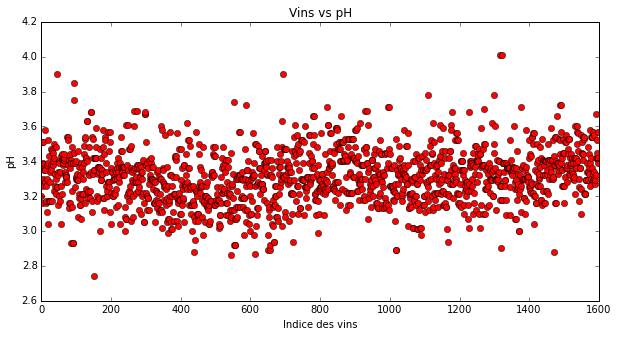

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(reds.index, reds.pH, 'ro')
ax.set_title('Vins vs pH')
ax.set_xlabel('Indice des vins')
ax.set_ylabel('pH')

Regardons seulement les 10 premiers vins rouges

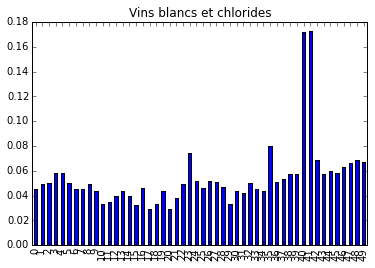

In [14]:
#reds[:10].pH.plot(kind='bar', title="Vins vs pH")

whites[:50].chlorides.plot(kind='bar', title='Vins blancs et chlorides')

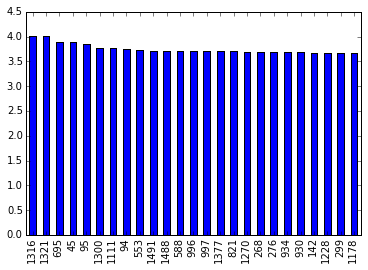

In [15]:
reds.sort('pH', ascending=False).pH[:25].plot(kind='bar')

Affichons la matrice de distribution de toutes les caractéristiques du vin rouge:

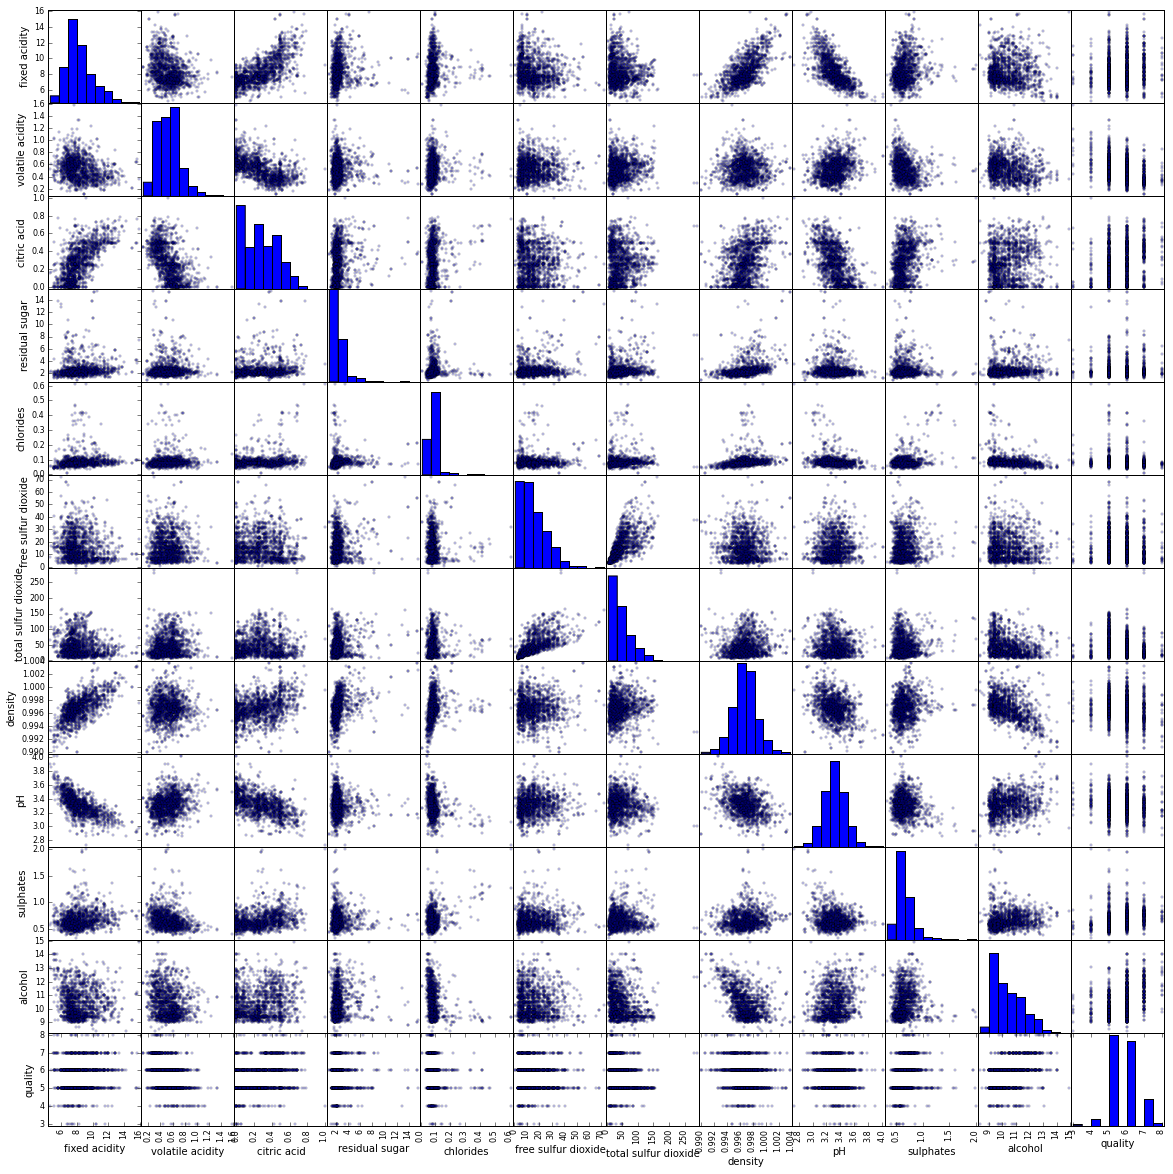

In [16]:
from pandas.tools.plotting import scatter_matrix
tmp = scatter_matrix(reds, alpha=0.2, figsize=(20,20))

Quelles propriétés distinguent les rouges des blancs ?

In [17]:
from pandas.tools.plotting import parallel_coordinates

On ajoute une nouvelle colonne qui indique le type de vin et on fusionne tous les vins dans un *dataframe*. Nous ne garderons que quelques propriétés pour cette analyse.

In [18]:
reds['kind'] = 'red'
whites['kind'] = 'white'
wines = reds.append(whites)
sub_wines = wines[['alcohol', 'pH', 'density', 'chlorides', 'kind']]

On va maintenant afficher chaque vin comme une ligne traversant toutes les colonnes de propriétés, en coupant l'axe à la hauteur de sa valeur. Les blancs et les rouges sont représentés dans des couleurs différentes.

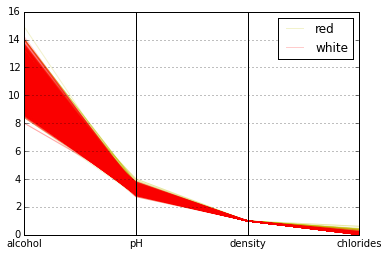

In [19]:
parallel_coordinates(sub_wines, 'kind', alpha=0.2, color=['y', 'r'])

Le résultat est difficile à interpréter car les caractéristiques ne sont pas normalisées.

/Users/sylchev/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/util/decorators.py:81: FutureWarning: the 'colors' keyword is deprecated, use 'color' instead
  warnings.warn(msg, FutureWarning)


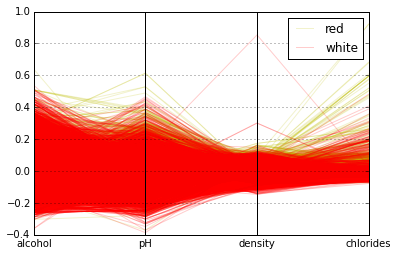

In [20]:
sub_wines = wines[['alcohol', 'pH', 'density', 'chlorides']]
sub_wines = (sub_wines - sub_wines.mean()) / (sub_wines.max() - sub_wines.min())
sub_wines['kind'] = wines['kind']
parallel_coordinates(sub_wines, 'kind', alpha=0.2, colors=['y', 'r'])

Les vins rouges et blancs semblent principalement différer par leur valeur de chloride.

## Classification des vins rouges et blancs

Voyons si on peut entrainer un algorithme à reconnaître les vins rouges des vins blancs. On définit le vecteur d'entrée comme étant toutes les colonnes sauf la colonne 'kind' (qui contient la classe du vin).

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
X = wines.iloc[:, 0:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


La sortie attendue est la colonne *'kind'*, qui est le type du vin. Il faut la convertir pour que le vin rouge soit étiqueté 0 et le vin blanc 1.

In [22]:
y = wines.kind
y = y.apply(lambda val: 0 if val == 'white' else 1)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: kind, dtype: int64

On crée un classifieur de type regression logistique. Voir http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression pour plus de détails. Nous allons entraîner et évaluer 5 classifieurs sur 5 sous-ensembles des données, les explications sont sur http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics.

In [24]:
clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=5)
print ("Accuracy: %0.2f%% (+/- %0.2f)" % (scores.mean()*100, scores.std() * 200))

Accuracy: 98.15% (+/- 1.33)


Les caractéristiques ne sont pas normalisées, ce qui peut dégrader largement les performances des classifieurs. Voir http://scikit-learn.org/stable/modules/preprocessing.html. Nous allons prétraiter les données pour qu'elles aient une moyenne nulle et une variance unitaire. Les données prétraitées ne sont plus un *dataFrame* mais un *numpy array* (généralisation des matrices).

In [25]:
from sklearn.preprocessing import scale
X_std = scale(X)
X_std

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ..., 
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

Entraînons et testons le classifieur avec les données normalisées:

In [26]:
scores_std = cross_val_score(clf, X_std, y, cv=5)
print ("Accuracy: %0.2f%% (+/- %0.2f)" % (scores_std.mean()*100, scores_std.std() * 200))

Accuracy: 99.32% (+/- 0.45)


La normalisation a permis de gagner 1% sur la précision.

Ce notebook est adapté de Peter Parente, [Data Science and IPython](http://tott-meetup.readthedocs.org/en/latest/sessions/ipython.html) du meetup Tools of the Trade.